In [20]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Read all result CSVs into a list
files = [
    "data/results/results_ros.csv",
    "data/results/results_rus.csv",
    "data/results/results_smote.csv",
    "data/results/results_st.csv",
    "data/results/results_adasyn.csv",
    "data/results/results_bs.csv",
]

# Read and merge all into one DataFrame
df_all = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

# Save combined results to a new file
df_all.to_csv("data/results/all_model_comparisons.csv", index=False)

print("Combined results saved to 'all_model_comparisons.csv'")

✅ Combined results saved to 'all_model_comparisons.csv'


/var/folders/w6/w676wsb95439rq1kjt_64k740000gn/T/ipykernel_8817/3945641306.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_n, y="Label", x="PR-AUC", palette="crest")


AttributeError: 'Rectangle' object has no attribute 'patches'

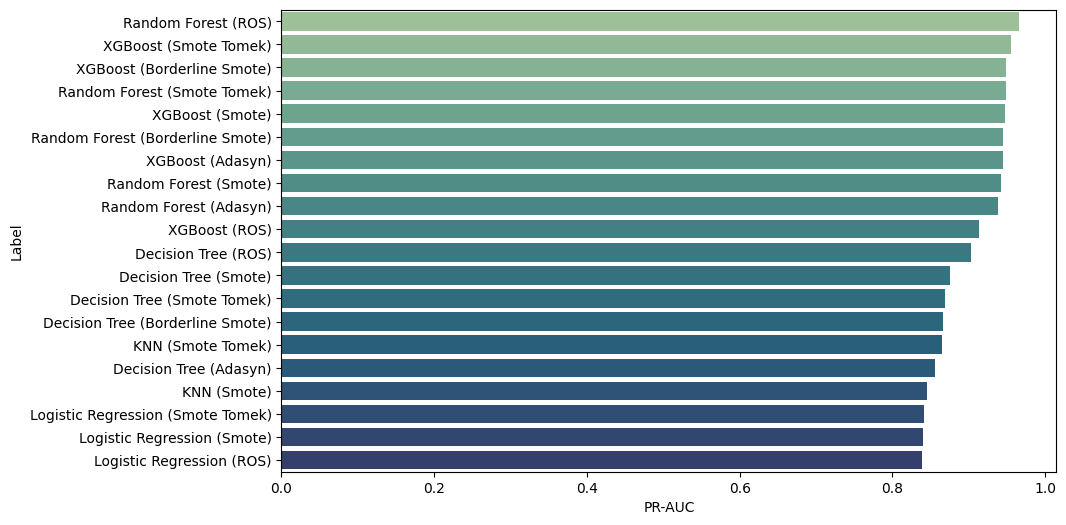

In [18]:
# En iyi 10 modeli PR-AUC değerine göre al
top_n = df_all.sort_values(by="PR-AUC", ascending=False).head(20).copy()

# Model ve resampling isimlerini birleştirip tek etiket yap
top_n["Label"] = top_n["Model"] + " (" + top_n["Resampling"] + ")"

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_n, y="Label", x="PR-AUC", palette="crest")

# Bar üstüne PR-AUC skorlarını yaz
for i in ax.containers[0]:
    ax.bar_label(i, fmt="%.3f", label_type="edge", padding=3)

plt.title("Top 10 Models by PR-AUC")
plt.xlabel("PR-AUC Score")
plt.ylabel("Model (with Resampling)")
plt.xlim(0.6, 0.9)  # Gerekirse değiştir
plt.tight_layout()
plt.show()